In [1]:
# Dependencies
import pandas as pd
import numpy as np
import csv
import requests
import json
import matplotlib.pyplot as plt

In [2]:
with open("stadiums_nfl.json") as datafile:
  data = json.load(datafile)
dataframe = pd.DataFrame(data)

In [3]:
dataframe.head()

,datasetid,fields,geometry,record_timestamp,recordid
0,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-87.61676997...",2017-04-13T04:48:16-04:00,acaab7736b25dbc81055f02ceb96041ea791aab6
1,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-95.41091997...",2017-04-13T04:48:16-04:00,b6b73850e7110b440b11ba18a3d5d18c4a4df399
2,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-94.48388009...",2017-04-13T04:48:16-04:00,dae0180f6c4107dbc52ea4174d0e331e135d8e74
3,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-90.08127999...",2017-04-13T04:48:16-04:00,bb9e7a8c6e5b57f863029203999e7fe3877b50ed
4,stadiums_nfl,"{'sector': 'High Value/Symboli', 'reliabilit':...","{'type': 'Point', 'coordinates': [-80.23888995...",2017-04-13T04:48:16-04:00,2c453332d4240ec71639594550cd223109270786


In [4]:
# Store filepath in a variable
file_one = "stadiums_nfl.csv"
file_two = "nfl_data.csv"

In [5]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
stadiums_nfl_df = pd.read_csv(file_one, encoding="ISO-8859-1")
stadiums_score_df = pd.read_csv(file_two)

In [6]:
# Show just the header
stadiums_nfl_df.head()

,CITY,STATE,REGION,NAME,TEAM,ROOF_TYPE,CONFERENCE,DIVISION,CAPACITY,LATITUDE,LONGITUDE,COLOR 1,COLOR 2
0,Glendale,AZ,West,University of Phoenix Stadium,Arizona Cardinals,Retractable,National,West,63400.0,33.52713,-112.25876,black,yellow
1,Oakland,CA,West,Oakland-Alameda County Coliseum,Oakland Raiders,Open,American,West,63026.0,37.75233,-122.19990,silver,NaN
2,San Diego,CA,West,Qualcomm Stadium,San Diego Chargers,Open,American,West,71294.0,32.78322,-117.11976,gold,dodgerblue
3,San Francisco,CA,West,Candlestick Park,San Francisco 49ers,Open,National,West,70207.0,37.71399,-122.38673,gold,NaN
4,Denver,CO,West,Invesco Field at Mile High,Denver Broncos,Open,American,West,76125.0,39.74396,-105.02028,navy,NaN


In [7]:
stadiums_score_df.head()

,Unnamed: 0,schedule_date,schedule_season,team_home,score_home,score_away,stadium,win/loss
0,11076,09/04/2014,2014,Seattle Seahawks,36.0,16.0,CenturyLink Field,W
1,11077,09/07/2014,2014,Atlanta Falcons,37.0,34.0,Georgia Dome,W
2,11078,09/07/2014,2014,Baltimore Ravens,16.0,23.0,M&T Bank Stadium,L
3,11079,09/07/2014,2014,Chicago Bears,20.0,23.0,Soldier Field,L
4,11080,09/07/2014,2014,Dallas Cowboys,17.0,28.0,Cowboys Stadium,L


In [8]:
# Export file as a CSV, without the Pandas index, but with the header
#stadiums_nfl_df_type.to_csv("stadiums_nfl_type.csv", index=False, header=True)

In [9]:
# Export file as a CSV, without the Pandas index, but with the header
#merge_stadiums_df.to_csv("stadiums_nfl_merge.csv", index=False, header=True)

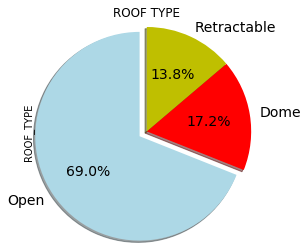

In [10]:
stadiums_nfl_df.ROOF_TYPE.value_counts().plot(kind='pie',explode=[0.1, 0, 0],autopct='%1.1f%%',radius=1.2, startangle=90,
                                              colors=['LightBlue','R','Y'],shadow=True, fontsize=14)

plt.title('ROOF TYPE')
plt.savefig("Rooftypepie.png",bbox_inches='tight')
plt.show()

In [11]:
#stadiums_merge_df = pd.concat([stadiums_nfl_df, stadiums_score_df], axis=1)

stadiums_merge_df= pd.merge(stadiums_nfl_df, stadiums_score_df, how='left', left_on=['NAME'], right_on=['stadium'])
stadiums_merge_df.drop(['Unnamed: 0', 'stadium'], axis=1, inplace=True)
stadiums_merge_df.head()


,CITY,STATE,REGION,NAME,TEAM,ROOF_TYPE,CONFERENCE,DIVISION,CAPACITY,LATITUDE,LONGITUDE,COLOR 1,COLOR 2,schedule_date,schedule_season,team_home,score_home,score_away,win/loss
0,Glendale,AZ,West,University of Phoenix Stadium,Arizona Cardinals,Retractable,National,West,63400.0,33.52713,-112.25876,black,yellow,09/08/2014,2014.0,Arizona Cardinals,18.0,17.0,W
1,Glendale,AZ,West,University of Phoenix Stadium,Arizona Cardinals,Retractable,National,West,63400.0,33.52713,-112.25876,black,yellow,09/21/2014,2014.0,Arizona Cardinals,23.0,14.0,W
2,Glendale,AZ,West,University of Phoenix Stadium,Arizona Cardinals,Retractable,National,West,63400.0,33.52713,-112.25876,black,yellow,10/12/2014,2014.0,Arizona Cardinals,30.0,20.0,W
3,Glendale,AZ,West,University of Phoenix Stadium,Arizona Cardinals,Retractable,National,West,63400.0,33.52713,-112.25876,black,yellow,10/26/2014,2014.0,Arizona Cardinals,24.0,20.0,W
4,Glendale,AZ,West,University of Phoenix Stadium,Arizona Cardinals,Retractable,National,West,63400.0,33.52713,-112.25876,black,yellow,11/09/2014,2014.0,Arizona Cardinals,31.0,14.0,W


In [32]:
stadiums_merge_df.rename(columns={'COLOR 1':'COLOR1', 'COLOR 2':'COLOR2','win/loss': 'WIN_LOSS','schedule_date':'SCHEDULE DATE',
                                 'schedule_season':'SCHEDULE SEASON','team_home':'TEAM HOME','score_home':'HOME SCORE',
                                 'score_away':'AWAY SCORE'}, inplace=True)
stadiums_merge_df.head()

,CITY,STATE,REGION,NAME,TEAM,ROOF_TYPE,CONFERENCE,DIVISION,CAPACITY,LATITUDE,LONGITUDE,COLOR1,COLOR2,SCHEDULE DATE,SCHEDULE SEASON,TEAM HOME,HOME SCORE,AWAY SCORE,WIN_LOSS
0,Glendale,AZ,West,University of Phoenix Stadium,Arizona Cardinals,Retractable,National,West,63400.0,33.52713,-112.25876,black,yellow,09/08/2014,2014.0,Arizona Cardinals,18.0,17.0,W
1,Glendale,AZ,West,University of Phoenix Stadium,Arizona Cardinals,Retractable,National,West,63400.0,33.52713,-112.25876,black,yellow,09/21/2014,2014.0,Arizona Cardinals,23.0,14.0,W
2,Glendale,AZ,West,University of Phoenix Stadium,Arizona Cardinals,Retractable,National,West,63400.0,33.52713,-112.25876,black,yellow,10/12/2014,2014.0,Arizona Cardinals,30.0,20.0,W
3,Glendale,AZ,West,University of Phoenix Stadium,Arizona Cardinals,Retractable,National,West,63400.0,33.52713,-112.25876,black,yellow,10/26/2014,2014.0,Arizona Cardinals,24.0,20.0,W
4,Glendale,AZ,West,University of Phoenix Stadium,Arizona Cardinals,Retractable,National,West,63400.0,33.52713,-112.25876,black,yellow,11/09/2014,2014.0,Arizona Cardinals,31.0,14.0,W


In [33]:
#stadiums_merge_df.dtypes


In [60]:
#R= {'schedule_season':'Schedule_Season','win/loss':'Win/Loss'}
#Total_Win_Loss= stadiums_merge_df.groupby(['schedule_season','win/loss',]).size().reset_index()#.rename(columns=R)
#Total_Win_Loss

In [61]:
#Total_Stadium_Type= stadiums_nfl_df.groupby(['CITY','ROOF_TYPE','NAME',]).size().reset_index()
#Total_Stadium_Type

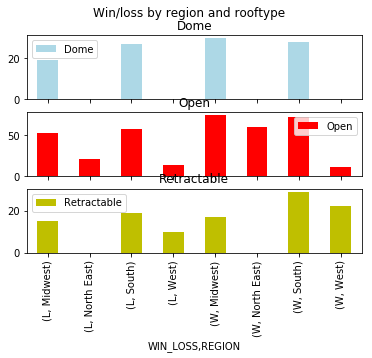

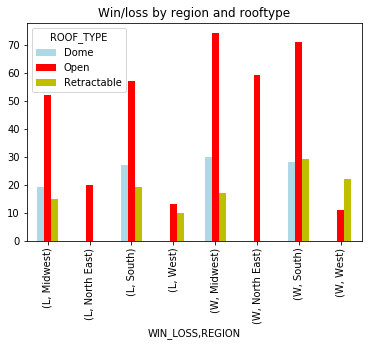

In [63]:
Bar_graph1_df=stadiums_merge_df.groupby(['WIN_LOSS','REGION','ROOF_TYPE']).size().unstack()
#color = {'
#plt.savefig("Win/loss by region and rooftype.png",bbox_inches='tight')
Bar_graph1_df.plot.bar(color=['LightBlue','R','Y'],subplots = 'true',title='Win/loss by region and rooftype')
plt.savefig("3Bargraph1.png",bbox_inches='tight')
Bar_graph1_df.plot.bar(color=['LightBlue','R','Y'],title='Win/loss by region and rooftype')
plt.savefig("Bargraph1.png",bbox_inches='tight')

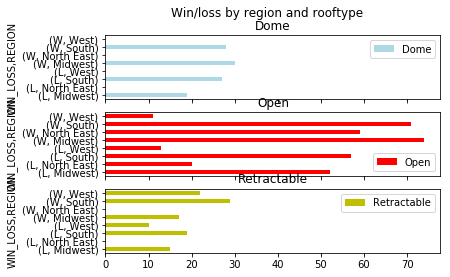

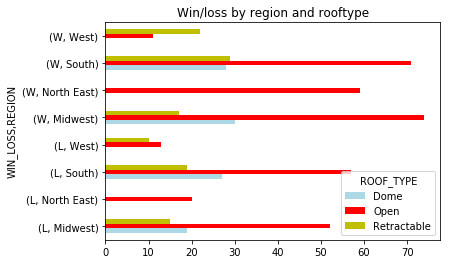

In [64]:
Bar_graph1_df=stadiums_merge_df.groupby(['WIN_LOSS','REGION','ROOF_TYPE']).size().unstack()

#plt.savefig("Win/loss by region and rooftype.png",bbox_inches='tight')
Bar_graph1_df.plot.barh(color=['LightBlue','R','Y'],subplots = 'true',title='Win/loss by region and rooftype')
plt.savefig("3HBargraph1.png",bbox_inches='tight')
Bar_graph1_df.plot.barh(color=['LightBlue','R','Y'],title='Win/loss by region and rooftype')
plt.savefig("HBargraph1.png",bbox_inches='tight')

In [31]:
#bar graph with --region, rooftype,win/loss
ax = Bar_graph1_df[['ROOF_TYPE']].plot(kind='bar', title ="V comp", figsize=(15, 10),unstack() 
                                                               legend=True, fontsize=12)


#Bar_graph1_df.REGION=pd.to_numeric(Bar_graph1_df.REGION)
#Bar_graph1_df.ROOF_TYPE=pd.to_numeric(Bar_graph1_df.ROOF_TYPE)
#Bar_graph1_df.WIN_LOSS=pd.to_numeric(Bar_graph1_df.WIN_LOSS)


ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("V", fontsize=12)
plt.show()

SyntaxError: invalid syntax (<ipython-input-31-78644e3456d2>, line 3)